In [1]:
import pandas as pd
df = pd.read_csv("../data/tmdb_5000_movies.csv")

In [3]:
import ast

# genres kolonundaki string ifadeleri listeye çevir
df["genre_names"] = df["genres"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

# İlk birkaç satırı görelim
df[["title", "genre_names"]].head()

,title,genre_names
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,Spectre,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,John Carter,"[Action, Adventure, Science Fiction]"


In [4]:
# Her türü ayrı satıra al
df_exploded = df.explode("genre_names")

In [5]:
# Gruplandır ve ortalama puanları al
genre_ratings = df_exploded.groupby("genre_names")["vote_average"].mean().sort_values(ascending=False)
genre_ratings

genre_names
History            6.719797
War                6.713889
Drama              6.388594
Music              6.355676
Foreign            6.352941
Animation          6.341453
Crime              6.274138
Documentary        6.238182
Romance            6.207718
Mystery            6.183908
Western            6.178049
Adventure          6.156962
Fantasy            6.096698
Family             6.029630
Thriller           6.010989
Science Fiction    6.005607
Action             5.989515
Comedy             5.945587
TV Movie           5.662500
Horror             5.626590
Name: vote_average, dtype: float64

C:\Users\Ensar\AppData\Local\Temp\ipykernel_10184\2459347166.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette="viridis")


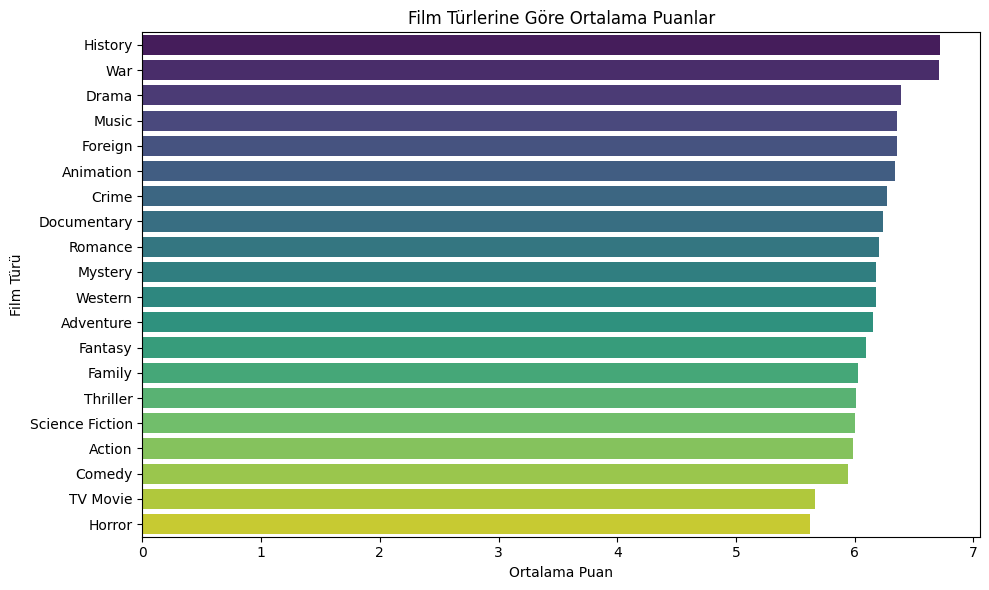

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette="viridis")
plt.xlabel("Ortalama Puan")
plt.ylabel("Film Türü")
plt.title("Film Türlerine Göre Ortalama Puanlar")
plt.tight_layout()

# Görseli kaydet
plt.savefig("../visuals/genre_average_ratings.png", dpi=300)
plt.show()

### 1. 🎞️ Film Türlerine Göre Ortalama Puanlar
Verilere göre "History", "War" ve "Drama" gibi ciddi ve duygusal türlerdeki filmler, diğer türlere göre daha yüksek puanlanmıştır. Buna karşılık "Horror", "TV Movie" ve "Comedy" türleri, izleyicilerden daha düşük ortalama puanlar almıştır. Bu durum, izleyici beklentilerinin türlere göre değişebileceğini ve bazı türlerin daha eleştirel değerlendirildiğini göstermektedir.

### 1. 🎞️ Average Ratings by Genre
According to the data, films in serious and emotional genres such as "History", "War", and "Drama" received higher ratings compared to other genres. In contrast, genres like "Horror", "TV Movie", and "Comedy" received lower average ratings from viewers. This indicates that audience expectations may vary by genre, and some genres are evaluated more critically.

In [8]:
# Türleri ayrı satırlara açmaya devam edelim (zaten df_exploded vardı)
vote_counts_by_genre = df_exploded.groupby("genre_names")["vote_count"].sum().sort_values(ascending=False)
vote_counts_by_genre

genre_names
Action             1310730
Drama              1222649
Adventure          1130229
Thriller            984605
Comedy              904362
Science Fiction     762688
Fantasy             561369
Crime               523809
Family              462875
Romance             406327
Animation           291604
Mystery             278103
Horror              257015
War                 108957
History              95898
Music                55592
Western              49844
Documentary           7765
TV Movie              1678
Foreign                366
Name: vote_count, dtype: int64

C:\Users\Ensar\AppData\Local\Temp\ipykernel_10184\96924114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts_by_genre.values, y=vote_counts_by_genre.index, palette="mako")


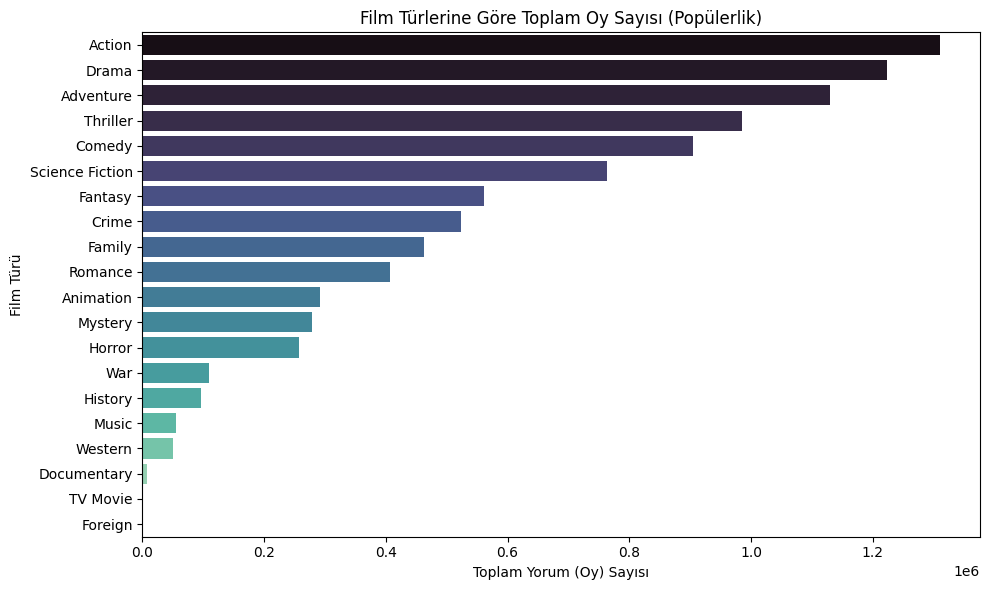

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=vote_counts_by_genre.values, y=vote_counts_by_genre.index, palette="mako")
plt.xlabel("Toplam Yorum (Oy) Sayısı")
plt.ylabel("Film Türü")
plt.title("Film Türlerine Göre Toplam Oy Sayısı (Popülerlik)")
plt.tight_layout()

# 📁 visuals klasörüne kaydet
plt.savefig("../visuals/vote_counts_by_genre.png", dpi=300)

plt.show()

### 2. 🔢 Yorum Sayısına Göre Türlerin Popülerliği
Film türleri arasında en çok oy alanlar "Action", "Adventure", "Comedy" gibi geniş izleyici kitlesine hitap eden türlerdir. Bu durum, bu türlerin hem daha çok izleyiciye ulaştığını hem de daha fazla etkileşim aldığını göstermektedir. Buna karşın "History" veya "War" gibi yüksek puanlı türlerin daha az oy aldığı gözlemlenmiştir. Bu da bu türlerin daha niş bir kitle tarafından izlendiğini düşündürebilir.

### 2. 🔢 Popularity by Genre (Vote Count)
Among movie genres, "Action", "Adventure", and "Comedy" — which appeal to large audiences — received the most votes. This suggests that these genres not only reach more viewers but also receive more interaction. In contrast, high-rated genres like "History" or "War" received fewer votes, which may indicate they are watched by more niche audiences.